In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Dummy%20Marketing%20and%20Sales%20Data/Dummy%20Data%20HSS.csv")

In [3]:
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    missing_target_rows = df[df['Sales'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    for column in ['TV', 'Radio', 'Social Media']:
        df[column] = df[column].fillna(df[column].mean())
    
    y = df['Sales']
    X = df.drop('Sales', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,TV,Radio,Social Media,Influencer
195,34.0,12.660398,3.325184,Mega
1263,99.0,33.899272,7.955181,Macro
172,82.0,23.434787,5.914866,Micro
2354,44.0,14.631639,0.635238,Nano
1669,42.0,13.766518,1.667910,Macro
...,...,...,...,...
2895,75.0,23.482965,3.750274,Micro
2763,74.0,16.777991,2.297886,Macro
905,13.0,4.418318,0.015489,Nano
3980,14.0,1.304560,2.523884,Mega


In [6]:
y_train

195     117.114141
1263    352.899957
172     288.020745
2354    156.863269
1669    149.334202
           ...    
2895    263.375045
2763    261.217139
905      44.870534
3980     49.646021
235     157.490072
Name: Sales, Length: 3196, dtype: float64

In [7]:
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, ['Influencer'])
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Influencer'])])),
                ('regressor', GradientBoostingRegressor())])

RMSE: 6.33
 R^2: 0.9953


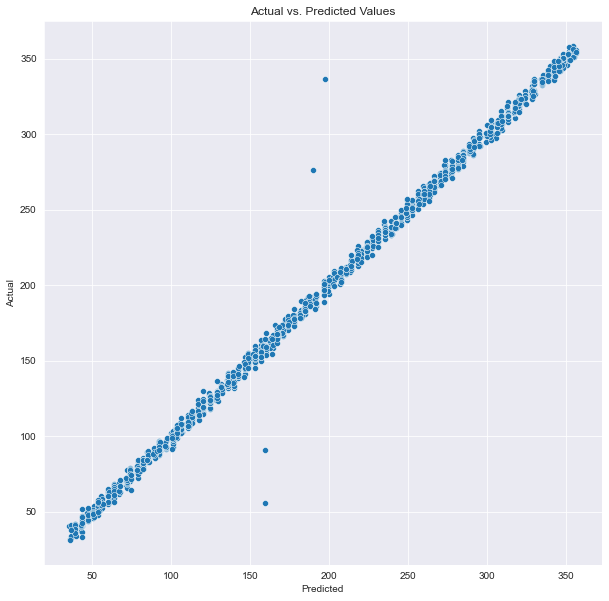

In [8]:
y_pred = model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("RMSE: {:.2f}".format(rmse))
print(" R^2: {:.4f}".format(r2))

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs. Predicted Values")
plt.show()